# UAS - Analisis dan Prediksi Lokasi Protein Bakteri E. coli

## Pendahuluan

Prediksi lokasi protein dalam sel bakteri E. coli merupakan aspek penting dalam bioinformatika karena membantu memahami fungsi biologis protein tersebut. Protein dapat terlokalisasi di berbagai bagian sel seperti sitoplasma, membran dalam, atau membran luar, dan masing-masing lokasi memiliki peran fungsional berbeda.

Dalam proyek ini, dilakukan klasifikasi lokasi protein berdasarkan ciri-ciri fisik dan kimiawi sekuens menggunakan dataset E. coli dari UCI Machine Learning Repository. Tujuannya adalah membangun model machine learning yang mampu memprediksi lokasi protein berdasarkan fitur yang tersedia.

## Data Understanding

### Sumber Data

Dataset Diambil dari link dibawah ini :

https://archive.ics.uci.edu/dataset/39/ecoli

### Pengambilan Data

Dataset ini berisi fitur-fitur numerik hasil analisis sekuens protein dari bakteri Escherichia coli, yang digunakan untuk memprediksi lokasi subseluler protein.

Untuk mengambil dataset ini secara langsung, digunakan pustaka ucimlrepo, sebuah library Python yang memungkinkan akses praktis ke dataset UCI.

In [16]:
# Instalasi library untuk mengambil dataset dari UCI
!pip install ucimlrepo
!pip install tabulate



In [5]:
# Import library

from ucimlrepo import fetch_ucirepo
import pandas as pd

# Mengambil dataset E. coli (ID = 39)
ecoli = fetch_ucirepo(id=39)

# Memisahkan fitur dan target
X = ecoli.data.features
y = ecoli.data.targets

# Menggabungkan fitur dan target dalam satu dataframe
data = ecoli.data.original

# Menampilkan struktur kolom dan tipe datanya
print(data.info())

# Menampilkan 5 data teratas
print(data.head())

# Menampilkan metadata dataset
print("\nMetadata:")
print(ecoli.metadata)

# Menampilkan informasi fitur dan target
print("\nInformasi Variabel:")
print(ecoli.variables)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sequence  336 non-null    object 
 1   mcg       336 non-null    float64
 2   gvh       336 non-null    float64
 3   lip       336 non-null    float64
 4   chg       336 non-null    float64
 5   aac       336 non-null    float64
 6   alm1      336 non-null    float64
 7   alm2      336 non-null    float64
 8   class     336 non-null    object 
dtypes: float64(7), object(2)
memory usage: 23.8+ KB
None
     Sequence   mcg   gvh   lip  chg   aac  alm1  alm2 class
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp

Metadata:
{'uci_id': 39, 'name': 'Ecoli', 

### Eksplorasi Data



In [6]:
display(data)

,Sequence,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


### Struktur Dataset

In [7]:
# ukuran fitur
data.shape

(336, 9)

In [8]:
# jumlah kolom
data.columns

Index(['Sequence', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class'], dtype='object')

Deskripsi singkat

| Kolom      | Tipe        | Deskripsi Singkat                                                                                                     |
| ---------- | ----------- | --------------------------------------------------------------------------------------------------------------------- |
| `Sequence` | Kategorikal | **ID unik** atau nama protein dalam format genetik atau Swiss-Prot (tidak digunakan untuk model, hanya identifikasi). |
| `mcg`      | Numerik     | Hasil dari **McGeoch's method** untuk mengenali signal sequence (indikasi awal lokasi subseluler).                    |
| `gvh`      | Numerik     | Hasil dari **von Heijne's method** untuk mendeteksi sinyal peptida.                                                   |
| `lip`      | Numerik     | Prediksi **sinyal lipoprotein** (bernilai biner: 0 atau 1).                                                           |
| `chg`      | Numerik     | Informasi tentang **muatan (charge)** pada bagian N-terminal protein.                                                 |
| `aac`      | Numerik     | Skor dari **analisis diskriminan terhadap komposisi asam amino**.                                                     |
| `alm1`     | Numerik     | Prediksi pertama dari **ALOM membrane spanning region** (transmembran domain 1).                                      |
| `alm2`     | Numerik     | Prediksi kedua dari **ALOM membrane spanning region** (transmembran domain 2).                                        |
| `class`    | Kategorikal | **Lokasi subseluler** tempat protein tersebut ditemukan, seperti:                                                     |

  - cp = cytoplasm

  - im = inner membrane

  - pp = periplasm

  - om = outer membrane

  - imU, imL = inner membrane (unsure / certain low)

  - imS = inner membrane (with signal sequence)

  - omL = outer membrane lipoprotein

  - dst. (klasifikasi target) |

### Identifikasi Kualitas Dataset

Analisis kualitas dataset penting dilakukan sebelum masuk ke tahap pemodelan, agar hasil klasifikasi menjadi akurat dan dapat diandalkan. Beberapa aspek yang dievaluasi dari dataset E. coli ini meliputi:

✅ 1. Jumlah dan Dimensi Data
Dataset terdiri dari:

  - 336 entri (baris) data protein
  - 9 kolom, yaitu 7 fitur numerik, 1 ID (Sequence), dan 1 target (class)

✅ 2. Kelengkapan Data (Missing Values)

Output menunjukkan tidak ada nilai yang hilang (null) pada seluruh kolom, yang berarti dataset ini lengkap dan tidak membutuhkan imputasi.


In [9]:
data.isnull().sum()


,0
Sequence,0
mcg,0
gvh,0
lip,0
chg,0
aac,0
alm1,0
alm2,0
class,0


✅ 3. Tipe Data

Hasilnya menunjukkan:
  - 7 kolom berupa float64 (fitur numerik)
  - 1 kolom Sequence berupa object (string ID)
  - 1 kolom class berupa object (kategori target)
  
Tipe data sudah sesuai dengan fungsinya:
  - Fitur bisa langsung digunakan untuk modeling
  - Target berupa label klasifikasi


In [10]:
data.dtypes


,0
Sequence,object
mcg,float64
gvh,float64
lip,float64
chg,float64
aac,float64
alm1,float64
alm2,float64
class,object


✅ 4. Distribusi Kelas (Imbalance Check)


Distribusi target tidak seimbang: Beberapa kelas (cp, im) memiliki jumlah data yang jauh lebih banyak dibandingkan kelas seperti imL atau imS.

⚠️ Ini berarti dataset bersifat imbalanced, dan dapat mempengaruhi performa model, terutama dalam memprediksi kelas minoritas. Solusi seperti oversampling, undersampling, atau penyesuaian skor evaluasi (f1-score, balanced accuracy) perlu dipertimbangkan.


In [29]:
class_counts = y_clean.value_counts().sort_values(ascending=False)

# Tampilkan jumlah data per kelas
print("Jumlah sampel per kelas:")
print(class_counts)

Jumlah sampel per kelas:
class
cp     141
im      72
pp      52
imU     33
om      19
imS      2
Name: count, dtype: int64


✅ 5. Deteksi Outlier dengan LOF (Local Outlier Factor)

Outlier adalah data yang secara signifikan berbeda dari mayoritas data lainnya dan dapat mempengaruhi performa model machine learning, terutama model berbasis jarak (misalnya KNN) atau regresi.

Untuk mendeteksi outlier dalam dataset E. coli, digunakan metode statistik sederhana yaitu Local Outlier Factor (LOF).


Apa itu LOF?

**Local Outlier Factor (LOF)** adalah algoritma berbasis kepadatan (density-based) yang digunakan untuk mendeteksi outlier. Metode ini membandingkan **kepadatan lokal** suatu titik dengan kepadatan lokal dari tetangganya. Jika kepadatan titik jauh lebih rendah daripada tetangganya, maka titik tersebut dianggap sebagai outlier.

---


In [17]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Ambil hanya fitur numerik
numeric_data = data.drop(columns=['Sequence', 'class'])

# Terapkan LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # 5% diprediksi outlier
outlier_preds = lof.fit_predict(numeric_data)

# Tambahkan hasil ke dataframe
data['outlier'] = outlier_preds

# LOF menghasilkan:
# -1 = outlier
#  1 = inlier

# Tampilkan jumlah outlier
print(data['outlier'].value_counts())

# Tampilkan baris yang terdeteksi sebagai outlier dalam bentuk tabel
outliers = data[data['outlier'] == -1]
print("\nOutlier Detected:")
print(tabulate(outliers.head(), headers='keys', tablefmt='grid'))


outlier
 1    319
-1     17
Name: count, dtype: int64

Outlier Detected:
+-----+------------+-------+-------+-------+-------+-------+--------+--------+---------+-----------+
|     | Sequence   |   mcg |   gvh |   lip |   chg |   aac |   alm1 |   alm2 | class   |   outlier |
+=====+============+=======+=======+=======+=======+=======+========+========+=========+===========+
|  20 | CRL_ECOLI  |  0.4  |  0.45 |  0.48 |   0.5 |  0.38 |   0.22 |   0    | cp      |        -1 |
+-----+------------+-------+-------+-------+-------+-------+--------+--------+---------+-----------+
|  21 | CSPA_ECOLI |  0.31 |  0.23 |  0.48 |   0.5 |  0.73 |   0.05 |   0.14 | cp      |        -1 |
+-----+------------+-------+-------+-------+-------+-------+--------+--------+---------+-----------+
| 143 | EMRA_ECOLI |  0.06 |  0.61 |  0.48 |   0.5 |  0.49 |   0.92 |   0.37 | im      |        -1 |
+-----+------------+-------+-------+-------+-------+-------+--------+--------+---------+-----------+
| 154 | CYOC_ECOLI

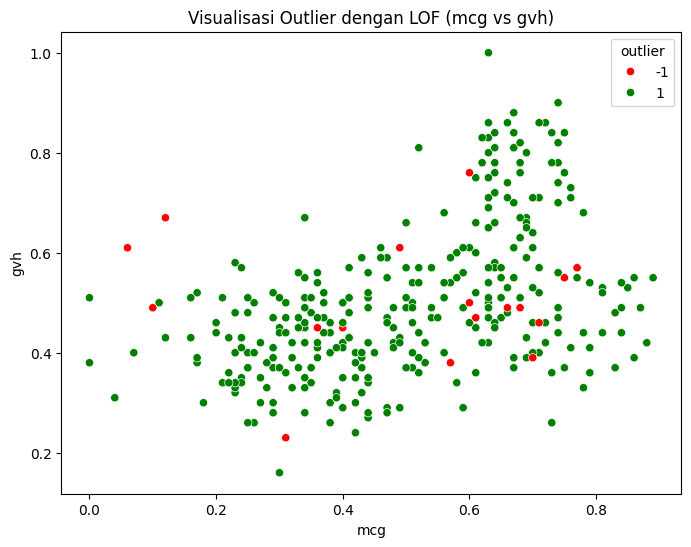

In [18]:
# Visualisasi dua dimensi (contoh pakai fitur 'gvh' vs 'mcg')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='mcg', y='gvh', hue='outlier', palette={1: "green", -1: "red"})
plt.title("Visualisasi Outlier dengan LOF (mcg vs gvh)")
plt.show()


📌 Nilai -1 dari LOF menunjukkan data yang dianggap outlier.

Parameter contamination=0.05 artinya kita asumsikan sekitar 5% data adalah outlier.

Karena akan berpengaruh terhadap hasil klasifikasi, maka saya akan menghapus baris outlier sebelum di modelling

In [14]:
data_cleaned = data[data['outlier'] != -1].drop(columns='outlier')

## Preprocessing Data

### Menghapus Outlier

In [20]:
# Buang outlier
data_clean = data[data['outlier'] != -1].drop(columns='outlier')

# Cek bentuk data setelah dibersihkan
print(f"Jumlah data setelah outlier dihapus: {data_clean.shape[0]} baris")


Jumlah data setelah outlier dihapus: 319 baris


Update Fitur dan target

In [22]:
# Pisahkan kembali fitur dan target dari data bersih
X_clean = data_clean.drop(columns=['Sequence', 'class'])
y_clean = data_clean['class']


### Normalisasi Fitur dengan MinMaxScaler

Keterangan:

Semua fitur akan memiliki nilai dalam rentang [0, 1]

Ini memastikan bahwa fitur dengan skala besar tidak mendominasi model

Target (y_clean) tidak perlu dinormalisasi karena berupa label kategori

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Terapkan scaler pada fitur numerik
X_scaled = scaler.fit_transform(X_clean)

# Konversi hasil ke DataFrame agar lebih mudah dibaca
X_scaled = pd.DataFrame(X_scaled, columns=X_clean.columns)

# Tampilkan 5 data pertama setelah normalisasi
X_scaled.head()


,mcg,gvh,lip,chg,aac,alm1,alm2
0,0.550562,0.154762,0.0,0.0,0.555556,0.216495,0.238095
1,0.078652,0.285714,0.0,0.0,0.527778,0.329897,0.345238
2,0.629213,0.285714,0.0,0.0,0.458333,0.350515,0.369048
3,0.662921,0.392857,0.0,0.0,0.500000,0.432990,0.250000
4,0.258427,0.190476,0.0,0.0,0.541667,0.226804,0.238095


Sekarang dataset sudah:

✅ Bebas outlier

✅ Sudah dinormalisasi

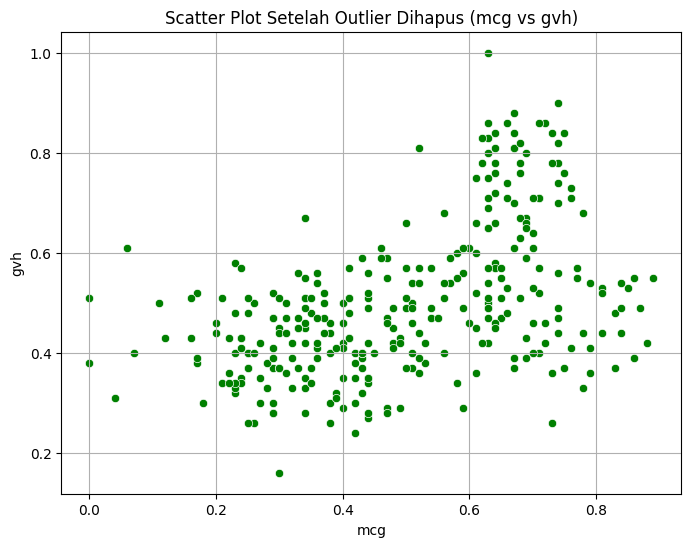

In [28]:
# Gunakan data yang sudah dibersihkan (data_clean)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data_clean,
    x='mcg',
    y='gvh',
    color='green'
)
plt.title("Scatter Plot Setelah Outlier Dihapus (mcg vs gvh)")
plt.xlabel("mcg")
plt.ylabel("gvh")
plt.grid(True)
plt.show()


## Modelling Menggunakan Naive Bayes

Apa Itu Naive Bayes?

Naive Bayes adalah algoritma klasifikasi berbasis teori probabilitas Teorema Bayes. Disebut "naive" karena mengasumsikan bahwa semua fitur bersifat independen satu sama lain (padahal dalam kenyataannya sering kali tidak demikian).

Meskipun asumsi ini cukup sederhana, Naive Bayes seringkali memberikan performa yang sangat baik.

**Teorema Bayes :**
$$
P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}
$$

**Keterangan:**

- \( P(C|X) \): Probabilitas kelas \( C \) diberikan fitur \( X \) (*posterior*)
- \( P(X|C) \): Probabilitas fitur \( X \) dalam kelas \( C \) (*likelihood*)
- \( P(C) \): Probabilitas awal kelas \( C \) (*prior*)
- \( P(X) \): Probabilitas fitur \( X \) (*evidence*)

**Independensi Antar Fitur :**

**Jika** $$( X = \{x_1, x_2, ..., x_n\} )$$ **maka:**

$$
P(X|C) = \prod_{i=1}^n P(x_i|C)
$$

**Sehingga fungsi klasifikasinya menjadi:**

$$
hat{C} = \underset{C_k \in Classes}{\arg\max} \; P(C_k) \prod_{i=1}^n P(x_i | C_k)
$$

### Training Model Naive Bayes

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Bagi data: 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)
# Inisialisasi dan latih model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Prediksi data test
y_pred = nb_model.predict(X_test)

# Evaluasi performa
print("Akurasi: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi: 93.75%

Classification Report:
              precision    recall  f1-score   support

          cp       0.97      1.00      0.98        28
          im       0.92      0.80      0.86        15
         imU       0.75      0.86      0.80         7
          om       1.00      1.00      1.00         4
          pp       1.00      1.00      1.00        10

    accuracy                           0.94        64
   macro avg       0.93      0.93      0.93        64
weighted avg       0.94      0.94      0.94        64


Confusion Matrix:
[[28  0  0  0  0]
 [ 1 12  2  0  0]
 [ 0  1  6  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 10]]


### Evaluasi Model Naive Bayes

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          cp       0.97      1.00      0.98        28
          im       0.92      0.80      0.86        15
         imU       0.75      0.86      0.80         7
          om       1.00      1.00      1.00         4
          pp       1.00      1.00      1.00        10

    accuracy                           0.94        64
   macro avg       0.93      0.93      0.93        64
weighted avg       0.94      0.94      0.94        64



## Modelling dengan Decision Tree

 Decision Tree Classifier

**Pengertian**

Decision Tree (pohon keputusan) adalah algoritma klasifikasi yang bekerja dengan membagi data ke dalam cabang-cabang (node) berdasarkan fitur tertentu. Tujuannya adalah membuat keputusan yang membawa data ke dalam kelas target.

Strukturnya menyerupai pohon:

  - Root Node: node awal (semua data)
  - Internal Node: fitur yang digunakan untuk split
  - Leaf Node: hasil prediksi akhir (kelas)

⚙️ Cara Kerja :
  - Pada setiap split, algoritma mencari fitur dan nilai terbaik untuk memisahkan data berdasarkan impurity (ketidakmurnian), menggunakan salah satu metrik:

  - Gini Impurity
  - Entropy / Information Gain


### Training Model Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)
# Inisialisasi dan latih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

### Evaluasi Model Decision Tree



In [40]:
# Prediksi
y_pred_dt = dt_model.predict(X_test)

# Hitung metrik evaluasi
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='weighted', zero_division=0)
rec_dt = recall_score(y_test, y_pred_dt, average='weighted', zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted', zero_division=0)

# Tampilkan hasil
print(f"Akurasi     : {acc_dt:.2f}")
print(f"Presisi     : {prec_dt:.2f}")
print(f"Recall      : {rec_dt:.2f}")
print(f"F1 Score    : {f1_dt:.2f}")


Akurasi     : 0.84
Presisi     : 0.85
Recall      : 0.84
F1 Score    : 0.84


## Evaluasi Model Klasifikasi

Evaluasi dilakukan untuk mengetahui seberapa baik model memprediksi kelas target. Metrik yang digunakan:

---

✅ Akurasi  
Persentase prediksi yang benar dari seluruh data.

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

---

✅ Presisi  
Dari semua yang diprediksi positif, berapa yang benar-benar positif.

$$
Precision = \frac{TP}{TP + FP}
$$

---

✅ Recall  
Dari semua data positif sebenarnya, berapa yang berhasil ditemukan model.

$$
Recall = \frac{TP}{TP + FN}
$$

---

✅ F1 Score  
Gabungan presisi dan recall dalam satu metrik.

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$


In [42]:
import pandas as pd

# Buat tabel evaluasi
eval_df = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes', 'Decision Tree'],
    'Akurasi': [acc_gnb, acc_dt],
    'Presisi': [prec_gnb, prec_dt],
    'Recall': [rec_gnb, rec_dt],
    'F1 Score': [f1_gnb, f1_dt]
})

# Tampilkan tabel dengan 2 desimal
print(eval_df.round(2))


                  Model  Akurasi  Presisi  Recall  F1 Score
0  Gaussian Naive Bayes     0.94     0.94    0.94      0.94
1         Decision Tree     0.84     0.85    0.84      0.84
